<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Сервис Яндекс.Недвижимость предоставил архив объявлений о продаже квартир в Санкт-Петербурге и области за последние несколько лет. 

Задача: научиться определять рыночную стоимость объектов недвижимости, установить параметры для построения автоматизированной системы, которая позволяет отслеживать аномалии и мошенническую деятельность. 

Каждая квартира содержит два вида данных: вписанные пользователем и автозаполеннеи на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма).

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#знакомлюсь с данными, используя разделение табуляцией
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#смотрю количество пропущенных значений по столбцам
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
#делаю описание всех столбцов
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

1) в исходных данных 23699 строк, при первой выгрузке данных видно, что в данных есть пропуски, надо разобраться, в каких они столбцах и чем они могут быть вызваны. после этого проведу замены, где это возможно. для улучшения понимания, что происходит в столбцах использую метод describe(). пропуски:

ceiling_height - в данных много пропущенных значений с высотой потолков, надо посмотреть уникальные значения этого столбца и, скорее всего, заменить медианой. <br>
floors_total - всего 86 пропущенных значений общего числа этажей в здании из почти 24к строк, это очень малая доля, либо эти данные можзно спокойно дропнуть, либо тоже замиенить на медиану <br>
living_area - здесь смотрю, что в столбце total_area пропусков нет, поэтому скорее всего заменю медианой, группируя по общей площади квартиры<br>
is_apartment - почти все значения пропущены, значит, квартира не является апартаментами, меняю на нули (или False), столбец будет преобразован в булев тип<br>
kitchen_area - есть пропущенные, около 10%, заполню медианой, группируя по living_area<br>
balcony - половина значений пропущена, делаю предположение о том, что в этих квартирах балконов нет, заполняю пропуски нулями<br>
locality_name - всего 49 пропущенных, эти данные ниоткуда не взять, можно от этих строк избавиться, либо не обращать на них внимания<br>
airports_nearest - можно сделать сводную таблицу для населенного пункта и заполнить медианой<br>
cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - аналогично с аэропортами <br>
days_exposition - есть пропущенные, эти данные мне заполнить неоткуда, можно вообще предположить, что на момент выгрузки данных объявление еще не было снято <br>
2) проверила данные на дубликаты, полных дубликатов не обнаружено <br>
3) тип данных не везде соответствует находящимся в них значениям, после работы над пропусками, тип данных будет необходимо изменить 

## Предобработка данных

In [5]:
#приступаю к заполнению пропусков и смене типов данных

#проверяю наличие дубликатов в данных перед обработкой, их нет, значит, их не нужно удалять
df.duplicated().sum()

#меняю пропусти в столбце балконы на 0 и проверяю результат
df['balcony'] = df['balcony'].fillna('0')
df['balcony'].isna().sum()
#меняю тип данных object у балконов на int, потому что балконы определяются целыми числами
df['balcony'] = df['balcony'].astype('int')


In [6]:
#пропуски в столбце "является апартаментами" заменяю на False - не являются
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()



0

In [7]:
#количество этажей в доме floors_total меняю на медианное значение с группировкой по населенному пункту, предполагая типовую застройку в н.п.
for loc_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == loc_name, 'floors_total'].median()
    #смотрю, что возвращает цикл
    #print(loc_name, median)
    df.loc[(df['floors_total'].isna()) & (df['locality_name'] == loc_name), 'floors_total'] = median
#проверяю замену пропущенных, на выходе 1, это значит, что для одной строки не был указан намеленный пункт, заменю медианой по столбцу этажей
df['floors_total'].isna().sum()
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
#проверяю результат, пропущенные значения отсутствуют 
df['floors_total'].isna().sum()
#тип столбца количества этажей меняю на целый
df['floors_total'] = df['floors_total'].astype('int')

In [8]:
#пропуски в высоте потолков меняю на медиану, группируя по количеству этажей в доме 
for floors_total in df['floors_total'].unique():
    median = df.loc[df['floors_total'] == floors_total, 'ceiling_height'].median()
    #print(floors_total, median)
    df.loc[(df['ceiling_height'].isna()) & (df['floors_total'] == floors_total), 'ceiling_height'] = median
df['ceiling_height'].isna().sum()
#оставшиеся два пропуска заменяю медианой по столбцу потолков
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0

In [9]:
#считаю коэффициент медианных значений жилой площади от общей
living_area_to_total = df['living_area'].median() / df['total_area'].median()
#заполняю пропущенные значения в столбце жилой площади группировкой по общей площади квартир умноженной на коэффициент медианных значений жилой площади от общей
df.loc[df['living_area'].isna(), 'living_area'] = df.loc[df['living_area'].isna(), 'total_area'] * living_area_to_total
df['living_area'].isna().sum()

0

In [10]:
#количество дней, сколько было размещено объявление меняю на 9999, это будет маркером того, что объеявление еще не снято с публикации
df['days_exposition'] = df['days_exposition'].fillna(999999)

#поменяла тип данных в столбце на целые, тк дни являются целыми числами
df['days_exposition'] = df['days_exposition'].astype('int')
df['days_exposition'].isna().sum()
df['days_exposition'].describe()

count     23699.000000
mean     134381.547407
std      340839.223291
min           1.000000
25%          45.000000
50%         124.000000
75%         390.000000
max      999999.000000
Name: days_exposition, dtype: float64

In [11]:
#считаю коэффициент медианных значений площади кухни от жилой площади
kitchen_area_to_living = df['kitchen_area'].median() / df['living_area'].median()
#заполняю пропущенные значения в столбце площади кухни группировкой по жилой площади квартир умноженной на коэффициент медианных значений площади кухни от жилой площади
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df.loc[df['kitchen_area'].isna(), 'living_area'] * kitchen_area_to_living
df['kitchen_area'].isna().sum()

0

In [12]:
#избавляюсь от лишнего в названии населенных пунктов для удобства обработки 
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex = True)
df['locality_name'] = df['locality_name'].str.replace('поселок', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('коттеджный', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('деревня', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('село', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('городского типа', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('городской', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('имени', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('станции', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной станции', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной', '', regex = True)
df.pivot_table(index = 'locality_name', values = 'cityCenters_nearest')
df['locality_name'].value_counts()
df['locality_name'].unique()
df[df['locality_name'].isna()]
#избавляюсь от пропусков в столбце расстояние до спб (cityCenters_nearest) значениями, взятыми из сводной таблицы населенный пункт-расстояние
city_centers_pvt = df.pivot_table(index = 'locality_name', values = 'cityCenters_nearest')
for locality_name in city_centers_pvt.index:
    df.loc[df['locality_name'] == locality_name, 'cityCenters_nearest'] = df.loc[df['locality_name'] == locality_name, 'cityCenters_nearest'].fillna(city_centers_pvt.loc[locality_name, 'cityCenters_nearest'])
#проверяю оставшиеся пропуски и заменяю их большим маркером 
df['cityCenters_nearest'].isna().sum()
df[df['cityCenters_nearest'].isna()]
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(-77777)
df['cityCenters_nearest'].isna().sum()




0

In [13]:
#в столбце locality_name всего 49 пропущенных значений, которые трудно как-то заполнить, поэтому решила их дропнуть, тк это всего 0.2% от всех данных
df['locality_name'].isna().sum()
df.dropna(subset = ['locality_name'], inplace = True)
df.info()
df['locality_name'].isna().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

0

In [14]:
df.query('parks_around3000 != parks_around3000 and parks_nearest != parks_nearest')
#сделала гипотезу о том, что если количество парков и прудов не указано, значит, их нет около жилья, поэтому меняю эти пропуски на 0
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().sum()
df['parks_around3000'].isna().sum()



0

In [15]:
#меняю все возможные пропущенные значения близости аэропорта, группируя по названию населенных пунктов, а все, что не поменялось, отмечаю маркером
for loc_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == loc_name, 'airports_nearest'].median()
    #print(loc_name, median)
    df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == loc_name), 'airports_nearest'] = median
df['airports_nearest'].isna().sum()
df['airports_nearest'] = df['airports_nearest'].fillna(-77777)
df['airports_nearest'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

0

In [16]:
#аналогично поступаю с расстоянием до парков и прудов
for loc_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == loc_name, 'parks_nearest'].median()
    #print(loc_name, median)
    df.loc[(df['parks_nearest'].isna()) & (df['locality_name'] == loc_name), 'parks_nearest'] = median


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [17]:
df['parks_nearest'].isna().sum()
df['parks_nearest'] = df['parks_nearest'].fillna(-77777)
df['parks_nearest'].isna().sum()

0

In [18]:
for loc_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == loc_name, 'ponds_nearest'].median()
    #print(loc_name, median)
    df.loc[(df['ponds_nearest'].isna()) & (df['locality_name'] == loc_name), 'ponds_nearest'] = median


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [19]:
df['ponds_nearest'].isna().sum()
df['ponds_nearest'] = df['ponds_nearest'].fillna(-77777)
df['ponds_nearest'].isna().sum()

0

In [20]:
#проверяю результат, пропусков не осталось
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [21]:
#методом info смортю типы данных, которые еще необходимо изменить
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [22]:
#данные столбцы перевожу в целочисленный тип данных, методом describe() было видно, что они были целыми числами, после запятых значений не было
df['last_price'] = df['last_price'].astype('int')
df['airports_nearest'] = df['airports_nearest'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['parks_nearest'] = df['parks_nearest'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['ponds_nearest'] = df['ponds_nearest'].astype('int')
#first_day_exposition надо перевести в тип дата-время:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
#df.info()
df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,25.000,0,Санкт-Петербург,18863,16028,1,482,2,755,999999
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.600000,1,False,...,11.000,2,Шушары,12817,18603,0,-77777,0,584,81
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.300000,4,False,...,8.300,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.60,14,91.730769,9,False,...,27.825,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,41.000,0,Санкт-Петербург,31856,8098,2,112,1,48,121


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

In [24]:
#добавляю в таблицу цену квадратного метра, рассчитанную как результат деления цены квартиры на общую площадь
df['price_per_meter'] = df['last_price'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,999999,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.600000,1,False,...,2,Шушары,12817,18603,0,-77777,0,584,81,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.300000,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.60,14,91.730769,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.000000


In [25]:
#посчитать и добавить в таблицу: день недели, месяц и год публикации объявления
df['day_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028,1,482,2,755,999999,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.600000,1,False,...,18603,0,-77777,0,584,81,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.300000,4,False,...,13933,1,90,2,574,558,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.60,14,91.730769,9,False,...,6800,2,84,3,234,424,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098,2,112,1,48,121,100000.000000,1,6,2018


In [26]:
#посчитать и добавить в таблицу: этаж квартиры; варианты — первый, последний, другой
       
def which_floor(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
        

df['which_floor'] = df.apply(which_floor, axis =1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,which_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1,482,2,755,999999,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.600000,1,False,...,0,-77777,0,584,81,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.300000,4,False,...,1,90,2,574,558,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.60,14,91.730769,9,False,...,2,84,3,234,424,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2,112,1,48,121,100000.000000,1,6,2018,другой


In [27]:
#посчитать и добавить в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
df['living_to_total_area'] = df['living_area'] / df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,which_floor,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755,999999,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.600000,1,False,...,0,584,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.300000,4,False,...,2,574,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.60,14,91.730769,9,False,...,3,234,424,408176.100629,4,7,2015,другой,0.576923,0.175000
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48,121,100000.000000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

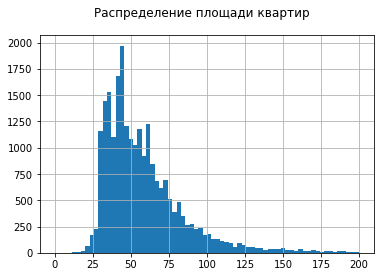

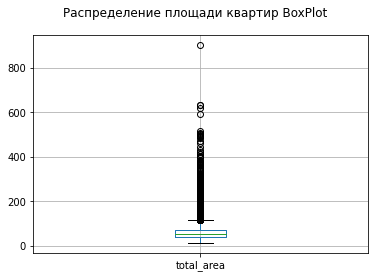

In [28]:

#изучены следующие параметры: площадь, цена, число комнат, высота потолков
#построены гистограммы для каждого параметра
df['total_area'].describe()
plt.suptitle('Распределение площади квартир')
df['total_area'].hist(bins = 70, range = (0, 200))
plt.show()
#гистограмма показывает нормальное распределение, есть выбросы - 900 квм, их убрала с графика, 
#пик примерно на 40квм, в среднем в объявлениях квартиры около 50 квм, что соответствует медианному значению
plt.suptitle('Распределение площади квартир BoxPlot')
df.boxplot(column = 'total_area')
plt.show()

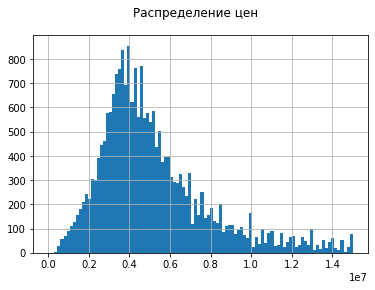

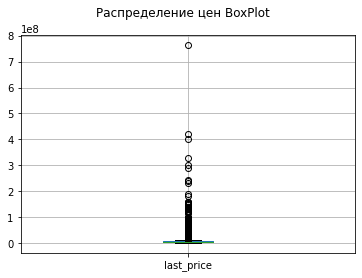

In [29]:
df['last_price']
plt.suptitle('Распределение цен')
df['last_price'].hist(bins = 100, range = (0, 15000000))
plt.show()
#получилось нормальное распределение, основная масса объявлений с ценой от 2 до 6 млн, 
#медианная цена квартир в объявлениях - от 3 до 5 млн (наибольшее число кв за 4 млн), 
#но есть и выбросы с ценой больше 50млн вплоть до 763млн
plt.suptitle('Распределение цен BoxPlot')
df.boxplot(column = 'last_price')
plt.show()

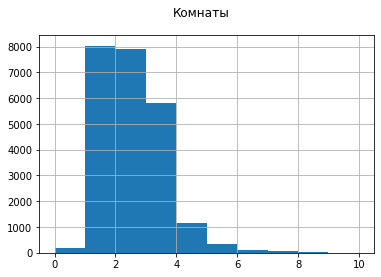

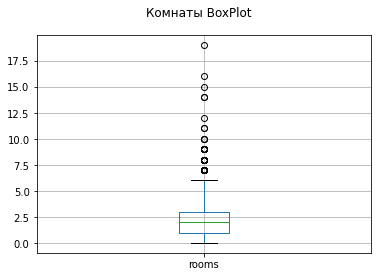

In [30]:
df['rooms'].describe()
plt.suptitle('Комнаты')
df['rooms'].hist(bins = 10, range = (0, 10))
plt.show()
#в основном в объявлениях 1-2 комнатные квартиры, чуть меньше, но тоже много трехкомнатных, 
#есть данные о 0 комнат (сделаю предположение, ято это студии, либо данные просто не указаны, можно посмотреть на сводной таблице)
#и также большое количество - 19
plt.suptitle('Комнаты BoxPlot')
df.boxplot(column = 'rooms')
plt.show()

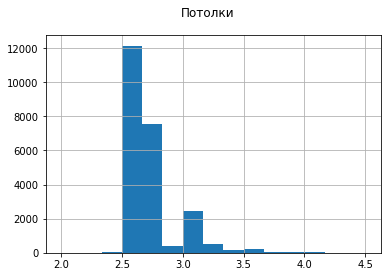

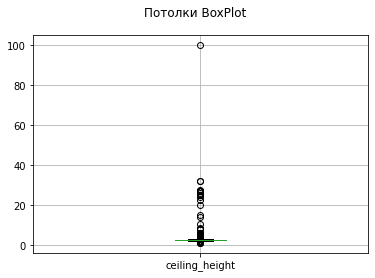

In [31]:
df['ceiling_height'].describe()
plt.suptitle('Потолки')
df['ceiling_height'].hist(bins = 15, range = (2, 4.5))
plt.show()
#почти во всех объявлениях вполне реальная высота потолков - 2,5-2,8 метра, но есть значение 100м, 
#можно посмотреть эту строку, возможно, это ошибка в данных
plt.suptitle('Потолки BoxPlot')
df.boxplot(column = 'ceiling_height')
plt.show()

In [32]:
#выполняю задание по изучению времени продажи квартиры 

#строю сводную таблицу по годам и медианному времени продажи квартиры
date_pvt = df.pivot_table(index = 'year_exposition', values = 'days_exposition', aggfunc = ['median', 'mean', 'count'])
date_pvt.columns = ['median_days', 'mean_days', 'count']
date_pvt





,median_days,mean_days,count
year_exposition,,,
2014,959,133143.529412,136
2015,613,60289.198636,1173
2016,248,24545.584087,2765
2017,110,33263.076115,8185
2018,78,112630.588228,8512
2019,999999,623838.729767,2879


из этой таблицы видно, что с 2014 года квартиры стали продаваться гораздо быстрее: <br>
медианное количество дней снизилось с 959 дней в 2014г до 78 дней в 2018г<br>
более того, отмечаю, что в 2019 году медианное время продажи - 999999, это маркер, которым были заменены пропущенные значения
он говорит нам о том, что большинство квартир, выставленных на продажу в 2019 еще не были проданы на момент выгрузки данных,
делаю вывод о том, что данные и были выгружены в 2019 году<br>
среднее по дням показывает странные значения - виной тому маркеры непроданных (не снятых с объявлений) квартир

In [33]:
#сделаю срез по квартирам, которые точно сняты с продажи
date_pvt_sold = df.query('days_exposition != 999999').pivot_table(index = 'year_exposition', values = 'days_exposition', aggfunc = ['median', 'mean', 'count'])
date_pvt_sold.columns = ['median_sold_days', 'mean_sold_days', 'count_sold']
date_pvt_sold


,median_sold_days,mean_sold_days,count_sold
year_exposition,,,
2014,876.0,911.338983,118
2015,581.0,652.130553,1103
2016,237.5,321.944774,2698
2017,103.0,159.028178,7914
2018,64.0,94.324199,7554
2019,23.0,30.931671,1083


здесь средние значения уже гораздо лучше, отмечается тренд к уменьшению срока продажи квартир от 2014 к 2019 году.<br>
в 2014 году медианное время продажи около 2,5 лет, тогда как к 2018 году квартиры начали продаваться за два месяца<br>
думаю, можно говорить об улучшении сервиса продажи жилья и об увеличении числа его пользователей, либо об увеличении их активности 
в поиске жилья, что может быть вызвано увеличением их платежеспособности<br>
в столбце count можно отметить, насколько больше квартир стали продавать через сервис поиска недвижимости, что тоже влияет на остальную статистику 

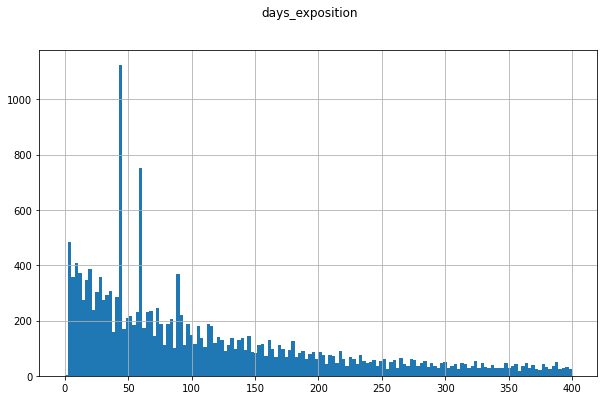

In [34]:
#строю гистограмму, за сколько дней продаются квартиры
plt.suptitle('days_exposition')
df['days_exposition'].hist(bins = 150, range = (0, 400), figsize = (10, 6))
plt.show()
#гистограмма отображает Пуассоновское распределение, есть пики наибольшего количества квартир, проджанных за примерно 40 дней и 60
#очень быстрая продажа - меньше 10 дней характерна примерно для 500 квартир в выборке




In [35]:
df.query('days_exposition != 999999').describe()
#самое длительное время размещения квартиры - 1580 дней
df.loc[df['days_exposition'] == 1580]
#это была квартира, выставленная в 2014 году, особо ничем не примечательная, у нее медианные значения цены и площади помещения 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,which_floor,living_to_total_area,kitchen_to_total_area
18843,11,3500000,48.2,2014-12-15,2,2.5,5,27.4,2,False,...,0,-77777,1580,72614.107884,0,12,2014,другой,0.568465,0.159751


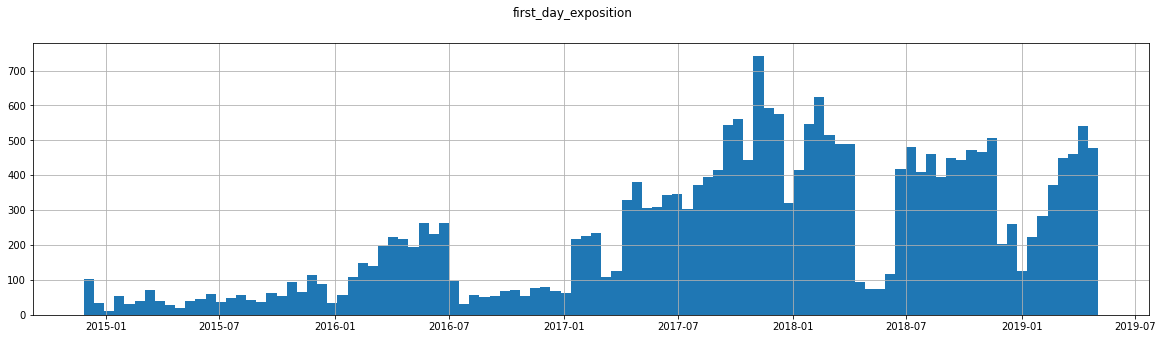

In [36]:
plt.suptitle('first_day_exposition')
df['first_day_exposition'].hist(figsize = (20, 5), bins = 100)
plt.show()


данная гистограмма показывает, насколько больше квартир начало продаваться с годами через сервис, на ней есть некоторые провалы
видно малое количество размещений объявлений в околоновогодний период, а также провал с апреля по июнь 2018 года, 
что, впрочем, не отразилось на общем числе проданных квартир в этот год 

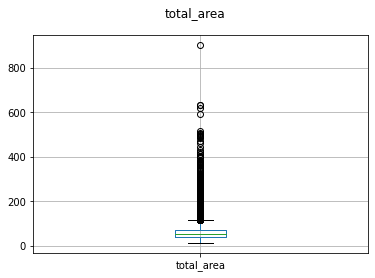

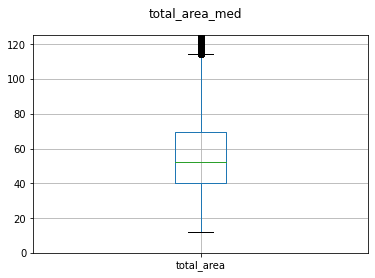

In [37]:
#"Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."

#исследую столбец общая площадь
df.boxplot(column = 'total_area')
plt.suptitle('total_area')
plt.show()
#вижу слишком большое значение, исследую эти данные
df['total_area'].describe()['max']
df.loc[df['total_area'] == 900]
#квартира стоила 420млн, последний этаж, жилая площадь - почти половина квартиры. 
#хоть данные и большие, не считаю их ошибочными, выглядит как что-то, что реально может существовать
df.boxplot(column = 'total_area')
plt.suptitle('total_area_med')
plt.ylim(0, 125)
plt.show()
#основная масса квартир попадает в 40-70квм

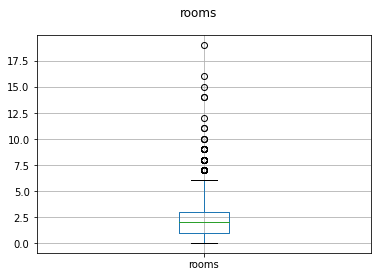

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,which_floor,living_to_total_area,kitchen_to_total_area
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.800000,7,False,...,0,503,999999,95264.017420,6,7,2018,последний,0.755580,0.072401
813,7,16500000,229.0,2016-02-25,8,3.00,6,160.000000,5,False,...,0,503,806,72052.401747,3,2,2016,другой,0.698690,0.109170
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.000000,4,False,...,2,435,418,68870.523416,5,12,2017,другой,0.611570,0.045730
4149,6,23000000,272.6,2018-01-11,10,3.14,7,145.900000,7,False,...,1,531,999999,84372.707263,3,1,2018,последний,0.535216,0.068966
4435,13,22190000,191.2,2017-12-05,8,2.90,6,115.800000,1,False,...,2,155,115,116056.485356,1,12,2017,первый,0.605649,0.026151
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.000000,3,False,...,0,503,14,110169.491525,3,2,2019,другой,0.693220,0.169492
7857,11,150000000,230.0,2017-10-25,8,2.80,8,220.000000,8,False,...,0,503,135,652173.913043,2,10,2017,последний,0.956522,0.290145
8758,5,16100000,150.0,2018-07-10,8,2.92,5,107.000000,1,False,...,0,503,999999,107333.333333,1,7,2018,первый,0.713333,0.048000
8822,14,49968900,398.0,2017-07-12,9,3.00,2,160.100000,1,False,...,2,440,471,125550.000000,2,7,2017,первый,0.402261,0.103015
8860,12,17000000,235.0,2018-07-14,9,3.00,6,135.576923,3,False,...,0,503,90,72340.425532,5,7,2018,другой,0.576923,0.175000


In [38]:

#исследую столбец rooms
df.boxplot(column = 'rooms')
plt.suptitle('rooms')
plt.show()
#видно, что основная масса объявлений о продаже 1-3 комнатных квартир, но есть значения 0 - надо их проверить, 
#а также есть большие выбросы, их тоже проверю - больше 7 комнат
df.query('rooms == 0')
#квартир с 0 комнат 197, ранее я делала гипотезу о том, что это квартиры студии, проверю:
df.query('rooms == 0 and studio == True')
#действительно из 197 квартир с 0 комнат 138 кв являются студиями, посмотрим, что с остальными
df.query('rooms == 0 and ((open_plan == True) or (studio == True))')
#это либо студии, либо квартиры со свободной планировкой, поэтому в них по 0 комнат, это верные значения, не буду от них избавляться
df.query('rooms > 7')
#таких квартир очень мало, всего 31. у них у всех очень большая площадь, поэтому предполагаю, 
#что такое количество комнат для них действительно верно. 



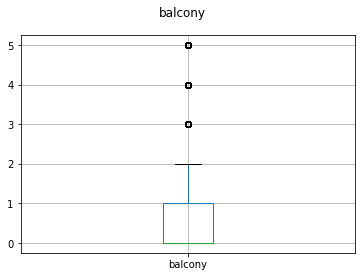

In [39]:
#исследую столбец balcony
df.boxplot(column = 'balcony')
plt.suptitle('balcony')
plt.show()
#тут все в порядке, в основном балконов 0-1, есть значения 5, но помня квартиры с 19 комнатами, все возможно, оставляю как есть

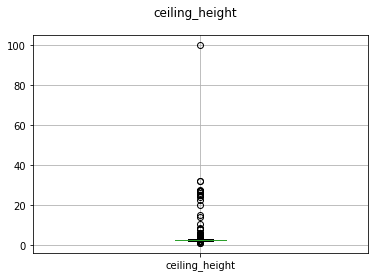

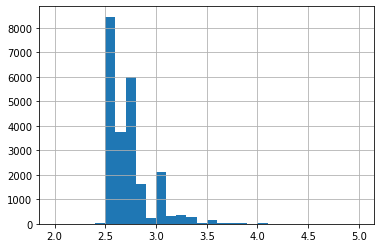

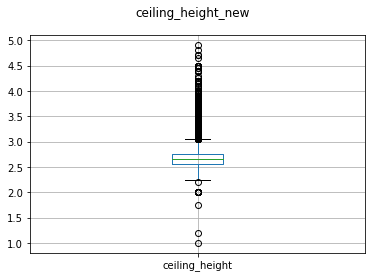

In [40]:
#исследую столбец ceiling_height
df.boxplot(column = 'ceiling_height')
plt.suptitle('ceiling_height')
plt.show()
#здесь явные неправильные значения, во-первых, квартира со 100метровым потолком, посмотрю на нее
#df.loc[df['ceiling_height'] == 100]
#строка с индексом 22869	

df['ceiling_height'].describe()
df['ceiling_height'].hist(bins = 30, range = (2, 5))
plt.show()
#все значения высоты потолков больше 5 метров:
df.query('ceiling_height > 5').pivot_table(index = 'floors_total', values = 'ceiling_height', aggfunc = 'median')
# #таких квартир всего 37, можно либо их дропнуть, либо заменить высоту потолков медианой
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] < 5, df['ceiling_height'].median())
df.query('ceiling_height > 5')
df['ceiling_height'].describe()

df.boxplot(column = 'ceiling_height')
plt.suptitle('ceiling_height_new')
plt.show()
#явных выбросов теперь нет, остались некоторые квартиры с высотой потолка 4-5 метров, но у них очень большая площадь, поэтому предположу, что здесь ничего аномального

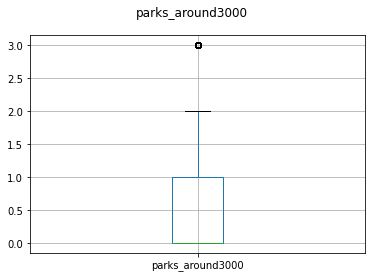

In [41]:
#исследую столбец parks_around3000
df.boxplot(column = 'parks_around3000')
plt.suptitle('parks_around3000')
plt.show()
#все в норме

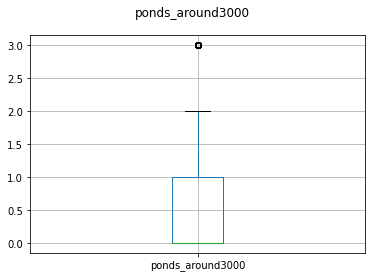

In [42]:
#исследую столбец ponds_around3000
df.boxplot(column = 'ponds_around3000')
plt.suptitle('ponds_around3000')
plt.show()
#тут тоже все в порядке

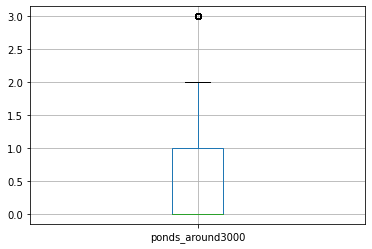

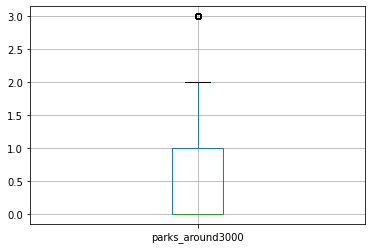

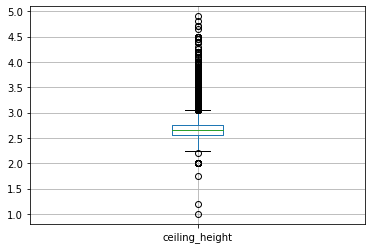

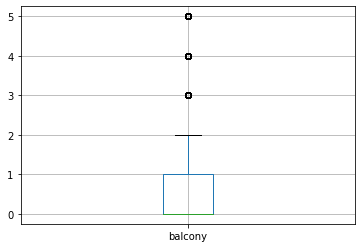

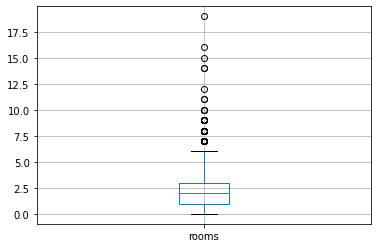

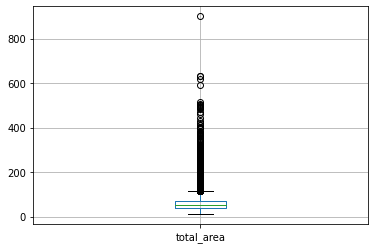

In [43]:
diagrams_df = df[['ponds_around3000', 'parks_around3000', 'ceiling_height', 'balcony', 'rooms', 'total_area']]
diagrams_df

for col in diagrams_df:
    diagrams_df.boxplot(col)
    plt.show()

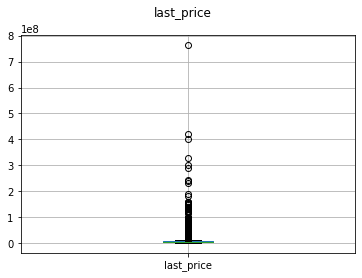

,total_area
last_price,
20040000,134.0
20100000,117.6
20275036,118.0
20295200,192.3
20300000,130.0
...,...
300000000,618.0
330000000,190.0
401300000,401.0


In [44]:
#исследую столбец last_price
df.boxplot(column = 'last_price')
plt.suptitle('last_price')
plt.show()

df.query('last_price > 20000000').pivot_table(index = 'last_price', values = 'total_area', aggfunc = 'median')
#честно говоря, не могу понять, наскольно это возможно, цена за квартиру 763 млн и стоит ли с этим в данном случае чего-то делать

Зависимость цены от квадратного метра: 0.6537428966335393


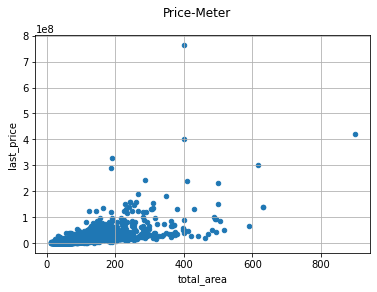

In [45]:
#выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, 
#числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: 
#    дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. 
#    Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью
#    жилья. Эти данные можно найти по имени в столбце 'locality_name'. "
print('Зависимость цены от квадратного метра:', df['last_price'].corr(df['total_area']))
df.plot(x = 'total_area', y = 'last_price', kind = 'scatter', grid = True)
plt.suptitle('Price-Meter')
plt.show()

#df.pivot_table(index = 'last_price', values = ['total_area', 'rooms', 'which_floor', 'cityCenters_nearest'])

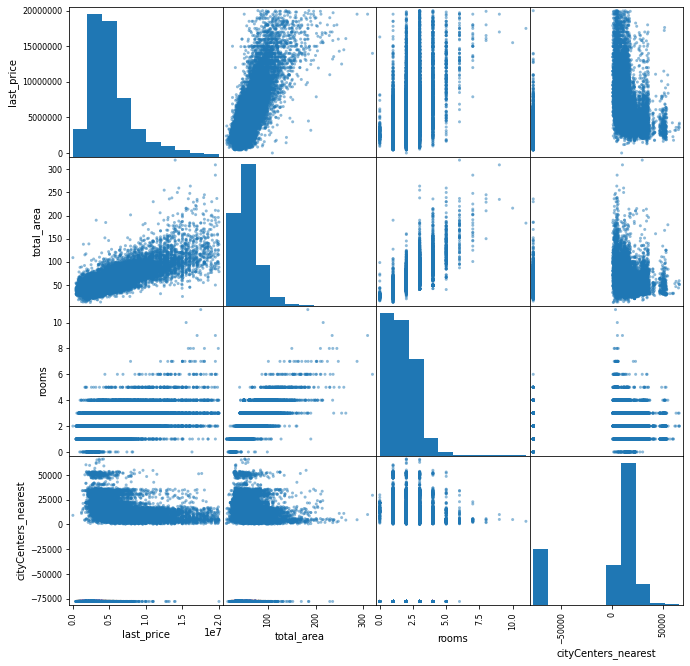

In [46]:
df_corr = df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].query('last_price < 20000000')
#df_corr
pd.plotting.scatter_matrix(df_corr, figsize=(11, 11)) 
plt.show()

In [47]:
df_corr.corr()
#наблюдаются подтверждения логичным выводам о том, что цена достаточно сильно зависит от площади квартиры (корреляция = 0,77) 
#а также видна сильная корреляция зависимости количества комнат от площади помещения

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.772523,0.513359,0.331790
total_area,0.772523,1.000000,0.799118,0.086072
rooms,0.513359,0.799118,1.000000,0.033347
cityCenters_nearest,0.331790,0.086072,0.033347,1.000000


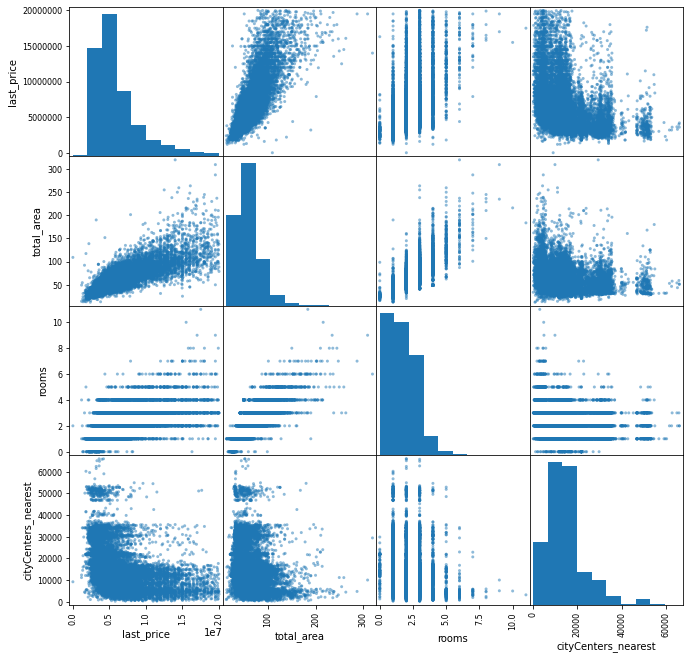

In [48]:
df_corr_new = df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].query('last_price < 20000000 and cityCenters_nearest != -77777')
pd.plotting.scatter_matrix(df_corr_new, figsize=(11, 11)) 
plt.show()

In [49]:
df_corr_new.corr()


,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.813070,0.564349,-0.369550
total_area,0.813070,1.000000,0.802369,-0.207913
rooms,0.564349,0.802369,1.000000,-0.155190
cityCenters_nearest,-0.369550,-0.207913,-0.155190,1.000000


отдельно посмотрела на корреляцию для данных, исключая маркер незаполненного столбца удаленности от центра. 

корреляция цены от площади и площади от количества комнат стала еще сильнее 

зависимость цены от количества комнат гораздо слабее, но на диаграмме все же виден небольшой тренд для увеличения цены при увеличении количества комнат

корреляция цены и удаленности от центра еще слабее -0,37

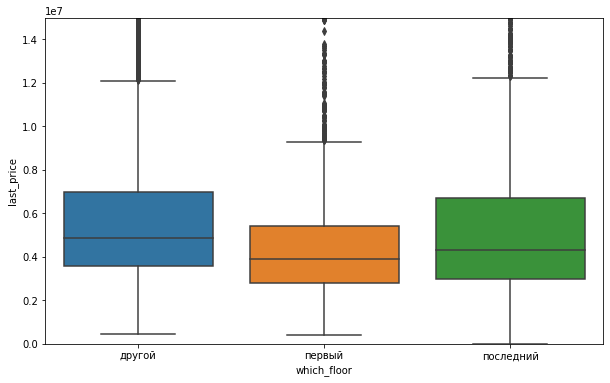

In [50]:
#зависимость этажности от цены посмотрю через boxplot

plt.figure(figsize = (10, 6))
ax = sns.boxplot(x = "which_floor", y = "last_price", data = df)
ax.set_ylim([0, 15_000_000])
plt.show()


по графику видно, что для первого этажа характерна меньшая цена, медиана - около 4 млн, а межквартильный размах Q3-Q1 - от 3 до 5,5 млн

боксплоты для последнего этажа и других этажей (не 1 и не последнего) очень схожи - примерно одинаковая медианная цена, 
но у квартир с категорией этажа "другой" все же немного побольше. а также очень схожий межквартильный размах. 

здесь явно видно, что у квартир последнего этажа есть странное значение цены около нуля, надо его проверить

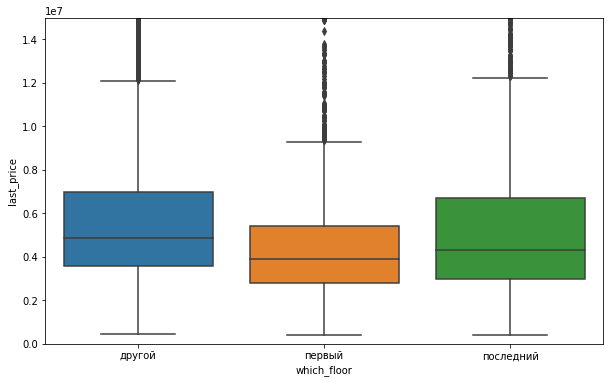

In [51]:
df.query('last_price < 1000000 and which_floor == "последний"').pivot_table(index = 'locality_name', values = ['last_price', 'which_floor'], aggfunc = 'first')
#цена меньше миллиона в основном у квартир, находящихся в небольших населенных пунктах, но есть квартира за 12190 в Санкт-Петербурге
df.query('last_price == 12190')
#это достаточно большая квартира - 109 квм, есть ощущение, что в цене не хватает пары нулей
df_price = df.query('total_area > 105 and total_area < 115 and locality_name == "Санкт-Петербург"').pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'first')
median_price = df_price['last_price'].median()
df.loc[df['last_price'] == 12190, 'last_price'] = median_price
df.query('last_price == 12190')
#изменила эту цену на медианную для похожих квартир

#проверяю, как изменились боксплоты. все осталось так же, но уже нет цены у квартир на последнем этаже в районе 0 
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x = "which_floor", y = "last_price", data = df)
ax.set_ylim([0, 15_000_000])
plt.show()

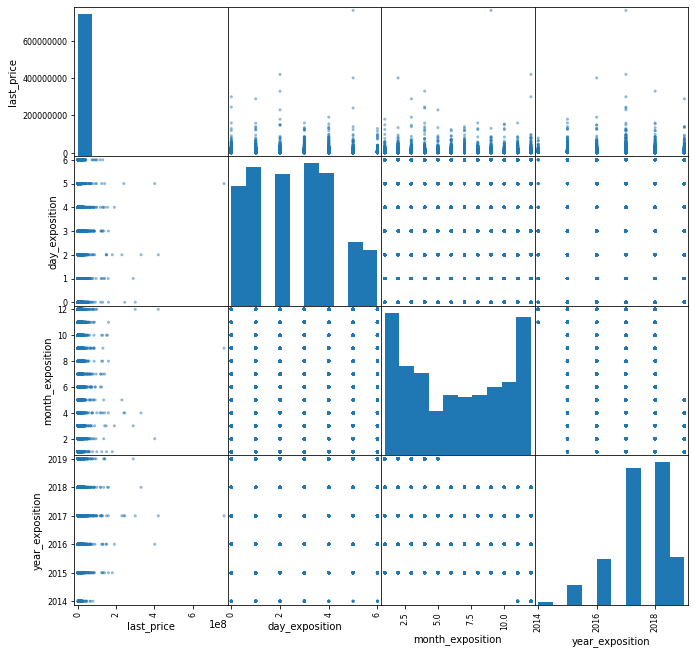

,last_price,day_exposition,month_exposition,year_exposition
last_price,1.000000,0.001591,0.002693,-0.042849
day_exposition,0.001591,1.000000,0.011354,-0.003844
month_exposition,0.002693,0.011354,1.000000,-0.271176
year_exposition,-0.042849,-0.003844,-0.271176,1.000000


In [52]:
#Также изучите зависимость цены от даты размещения: дня недели, месяца и года
df_corr_price_date = df[['last_price', 'day_exposition', 'month_exposition', 'year_exposition']]
pd.plotting.scatter_matrix(df_corr_price_date, figsize=(11, 11)) 
plt.show()
df_corr_price_date.corr()
#судя по всему, никакой зависимости цены от даты размещения объявления нет 

In [53]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах.

df_locality_pvt = df.pivot_table(index = 'locality_name', values = ['last_price', 'price_per_meter'], aggfunc = 
                                 ['median', 'mean', 'count'])

df_locality_pvt.columns = ['med_price', 'med_price_per_meter', 'mean_price', 'mean_price_per_meter', 'count', 'count2']


df_locality_pvt.drop('count2', axis=1, inplace=True)
df_locality_pvt

top_ten_localities = df_locality_pvt.sort_values(by = 'count', ascending = False).head(10)
top_ten_localities
#вывела 10 населенных пунктов с наибольшим числом объявлений со средним и медианным значением цен


,med_price,med_price_per_meter,mean_price,mean_price_per_meter,count
locality_name,,,,,
Санкт-Петербург,5500000.0,104761.904762,8.063319e+06,114849.008794,15721
Мурино,3400000.0,85878.462169,3.652361e+06,85681.762601,556
Шушары,3950000.0,76876.172608,4.108082e+06,78677.364217,440
Всеволожск,3450000.0,65789.473684,3.789068e+06,68654.473986,398
Пушкин,5180000.0,100000.000000,6.469036e+06,103125.819291,369
Колпино,3600000.0,74723.748474,3.964021e+06,75424.579098,338
Парголово,4100000.0,91642.857143,4.488075e+06,90175.913458,327
Гатчина,3100000.0,67796.610169,3.488337e+06,68746.146763,307
Кудрово,3790000.0,91860.465116,4.234158e+06,92473.547576,299


In [54]:
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
#10 населенных пунктов с самой низкой ценой за квадратный метр
top_cheap_localities = df_locality_pvt.sort_values(by = 'med_price_per_meter', ascending = False).tail(10)
top_cheap_localities

,med_price,med_price_per_meter,mean_price,mean_price_per_meter,count
locality_name,,,,,
Житково,1000000.0,14956.275202,1000000.0,14956.275202,2
Ям-Тесово,625000.0,13711.553373,625000.0,13711.553373,2
Сижно,850000.0,13709.677419,850000.0,13709.677419,1
Тесово-4,750000.0,12931.034483,750000.0,12931.034483,1
Малая Романовка,850000.0,12724.550898,850000.0,12724.550898,1
Совхозный,517500.0,12629.129129,517500.0,12629.129129,2
Выскатка,585000.0,12335.480902,585000.0,12335.480902,2
Вахнова Кара,450000.0,11688.311688,450000.0,11688.311688,1
Свирь,575000.0,11481.481481,575000.0,11481.481481,2


In [55]:
#10 населенных пунктов с самой высокой ценой за квадратный метр
top_expensive_localities = df_locality_pvt.sort_values(by = 'med_price_per_meter', ascending = False).head(10)
top_expensive_localities

,med_price,med_price_per_meter,mean_price,mean_price_per_meter,count
locality_name,,,,,
Санкт-Петербург,5500000.0,104761.904762,8.063319e+06,114849.008794,15721
Зеленогорск,4750000.0,101666.666667,6.288338e+06,115122.799198,24
Пушкин,5180000.0,100000.000000,6.469036e+06,103125.819291,369
Кудрово,4100000.0,100000.000000,4.573916e+06,100253.043304,173
Сестрорецк,5450000.0,99678.456592,6.341722e+06,101757.616875,183
Левашово,4200000.0,96997.690531,4.200000e+06,96997.690531,1
Кудрово,3790000.0,91860.465116,4.234158e+06,92473.547576,299
Парголово,4100000.0,91642.857143,4.488075e+06,90175.913458,327
Мурино,3748625.0,91478.394974,4.105287e+06,92722.708914,34


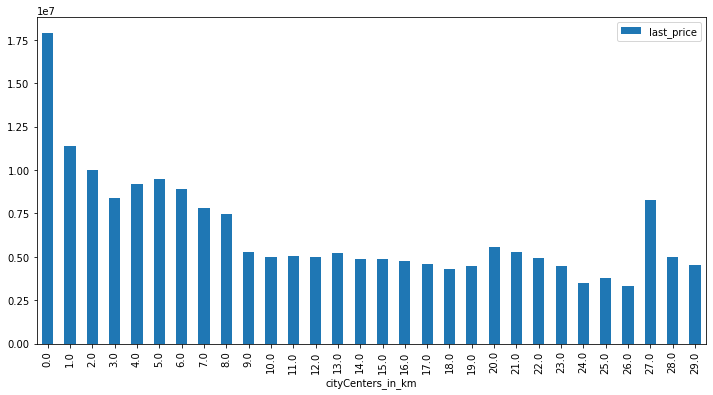

In [56]:
# "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге 
# ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: 
# округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, 
#     как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

df.query('locality_name == "Санкт-Петербург"')
df_spb = df[['locality_name', 'last_price', 'cityCenters_nearest']]
df_spb = df_spb.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != -77777')
df_spb.sort_values(by = 'cityCenters_nearest').head(10)
df_spb['cityCenters_in_km'] = df_spb['cityCenters_nearest'] / 1000
df_spb['cityCenters_in_km'] = df_spb['cityCenters_in_km'].round()
df_spb.drop('cityCenters_nearest', axis=1, inplace=True)
df_spb_pvt = df_spb.pivot_table(index = 'cityCenters_in_km', values = 'last_price', aggfunc = 'median')
df_spb_pvt.plot(kind = 'bar', figsize = (12, 6))
plt.show()

#взяла данные по СПб, убрав маркированные ранее значения, расчитала медианную цену для км отдаления от центра, построила столбчатую диаграмму
#самая большая цена характерна для значений 0км - самые центральные квартиры, дальше идет группа приближенных к центру объявлений, 
#до 8км, это и буду считать центральной зоной



"Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, 
 высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, 
 дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

In [57]:
df_all_spb = df[['locality_name', 'cityCenters_nearest', 'total_area', 'last_price', 'rooms', 'ceiling_height', 'which_floor', 'floor', 'day_exposition', 'month_exposition', 'year_exposition']]
df_all_spb = df_all_spb.query('locality_name == "Санкт-Петербург"')
df_all_spb['cityCenters_km'] = (df_all_spb['cityCenters_nearest'] / 1000).round()
df_all_spb.drop('cityCenters_nearest', axis=1, inplace=True)
df_all_spb
df_center_spb = df_all_spb.query('cityCenters_km <= 8')
df_center_spb


,locality_name,total_area,last_price,rooms,ceiling_height,which_floor,floor,day_exposition,month_exposition,year_exposition,cityCenters_km
3,Санкт-Петербург,159.00,64900000.0,3,2.60,другой,9,4,7,2015,7.0
4,Санкт-Петербург,100.00,10000000.0,2,3.03,другой,13,1,6,2018,8.0
24,Санкт-Петербург,97.20,6500000.0,2,2.80,первый,1,5,10,2015,2.0
35,Санкт-Петербург,149.00,15500000.0,5,2.55,другой,4,0,6,2017,4.0
51,Санкт-Петербург,161.00,45000000.0,3,3.20,другой,4,1,10,2017,7.0
...,...,...,...,...,...,...,...,...,...,...,...
23665,Санкт-Петербург,47.00,4250000.0,1,3.00,первый,1,4,5,2016,5.0
23681,Санкт-Петербург,43.00,5250000.0,2,2.50,другой,2,4,5,2018,7.0
23690,Санкт-Петербург,52.00,5500000.0,2,2.55,другой,2,3,7,2018,6.0
23691,Санкт-Петербург,72.90,9470000.0,2,2.75,другой,7,3,10,2016,4.0


In [58]:
#анализ параметров: площадь, цена, число комнат, высота потолков.
#(для центральных квартир)
df_center_spb_1 = df_center_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']]

df_center_spb_1.describe()

,total_area,last_price,rooms,ceiling_height
count,4122.000000,4.122000e+03,4122.000000,4122.000000
mean,90.326659,1.418037e+07,2.757885,2.943345
std,58.882906,2.358049e+07,1.426035,0.339908
min,12.000000,1.600000e+06,0.000000,2.000000
25%,55.000000,6.450000e+06,2.000000,2.700000
50%,76.000000,8.960000e+06,3.000000,3.000000
75%,107.000000,1.390000e+07,3.000000,3.100000
max,900.000000,7.630000e+08,19.000000,4.900000


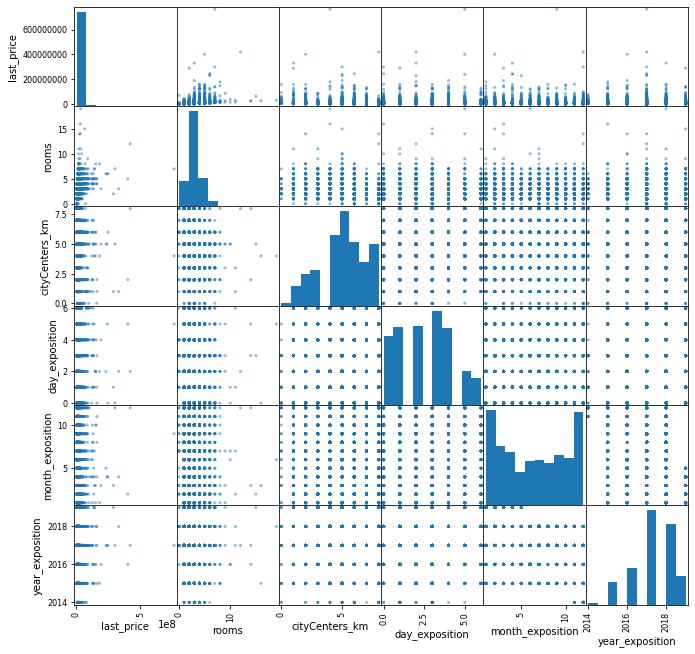

,last_price,rooms,cityCenters_km,day_exposition,month_exposition,year_exposition
last_price,1.000000,0.340541,-0.076020,0.020718,-0.004189,-0.047097
rooms,0.340541,1.000000,-0.196321,-0.010691,-0.014577,-0.064537
cityCenters_km,-0.076020,-0.196321,1.000000,0.023109,-0.001446,0.047634
day_exposition,0.020718,-0.010691,0.023109,1.000000,0.037053,0.000900
month_exposition,-0.004189,-0.014577,-0.001446,0.037053,1.000000,-0.240260
year_exposition,-0.047097,-0.064537,0.047634,0.000900,-0.240260,1.000000


In [59]:
#факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) 
#(для центральных квартир)
df_center_spb_2 = df_center_spb[['last_price', 'rooms', 'cityCenters_km', 'day_exposition', 'month_exposition', 'year_exposition']]

pd.plotting.scatter_matrix(df_center_spb_2, figsize=(11, 11)) 
plt.show()
df_center_spb_2.corr()

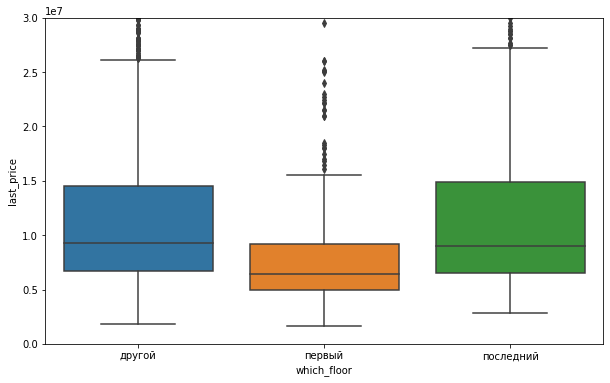

In [60]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x = "which_floor", y = "last_price", data = df_center_spb)
ax.set_ylim([0, 30_000_000])
plt.show()

In [61]:
#анализ параметров: площадь, цена, число комнат, высота потолков.
#(для все квартир в СПб)
df_all_spb_1 = df_all_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']]

df_all_spb_1.describe()

,total_area,last_price,rooms,ceiling_height
count,15721.000000,1.572100e+04,15721.000000,15721.000000
mean,64.751488,8.063319e+06,2.171618,2.732805
std,40.417095,1.301303e+07,1.148098,0.251078
min,12.000000,1.190000e+06,0.000000,1.000000
25%,42.000000,4.200000e+06,1.000000,2.550000
50%,55.000000,5.500000e+06,2.000000,2.700000
75%,74.600000,8.170000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,4.900000


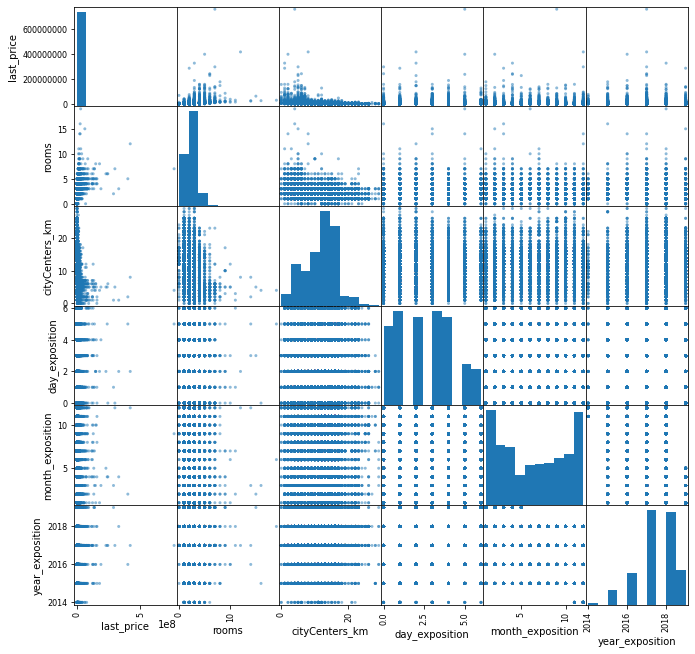

,last_price,rooms,cityCenters_km,day_exposition,month_exposition,year_exposition
last_price,1.000000,0.372369,-0.257879,0.006133,-0.000035,-0.044494
rooms,0.372369,1.000000,-0.291331,-0.007932,-0.008322,-0.061159
cityCenters_km,-0.257879,-0.291331,1.000000,-0.000015,0.008245,0.085176
day_exposition,0.006133,-0.007932,-0.000015,1.000000,0.002803,-0.003286
month_exposition,-0.000035,-0.008322,0.008245,0.002803,1.000000,-0.277916
year_exposition,-0.044494,-0.061159,0.085176,-0.003286,-0.277916,1.000000


In [62]:
#факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) 
#(для все квартир в СПб)
df_all_spb_2 = df_all_spb[['last_price', 'rooms', 'cityCenters_km', 'day_exposition', 'month_exposition', 'year_exposition']]

pd.plotting.scatter_matrix(df_all_spb_2, figsize=(11, 11)) 
plt.show()
df_all_spb_2.corr()

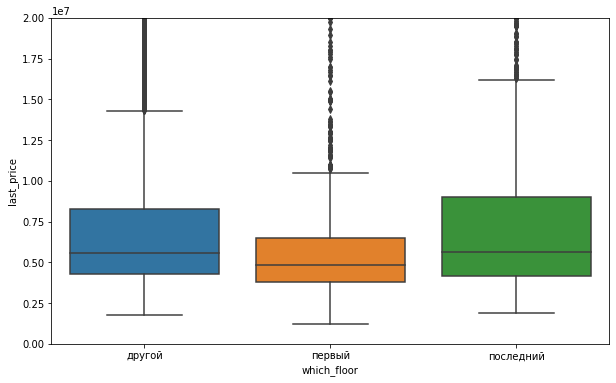

In [63]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x = "which_floor", y = "last_price", data = df_all_spb)
ax.set_ylim([0, 20_000_000])
plt.show()

In [64]:
#сравнение параметров площадь, цена, число комнат, высота потолков во центре города и во всем СПб
print(df_center_spb_1.describe())
print()
print(df_all_spb_1.describe())



        total_area    last_price        rooms  ceiling_height
count  4122.000000  4.122000e+03  4122.000000     4122.000000
mean     90.326659  1.418037e+07     2.757885        2.943345
std      58.882906  2.358049e+07     1.426035        0.339908
min      12.000000  1.600000e+06     0.000000        2.000000
25%      55.000000  6.450000e+06     2.000000        2.700000
50%      76.000000  8.960000e+06     3.000000        3.000000
75%     107.000000  1.390000e+07     3.000000        3.100000
max     900.000000  7.630000e+08    19.000000        4.900000

         total_area    last_price         rooms  ceiling_height
count  15721.000000  1.572100e+04  15721.000000    15721.000000
mean      64.751488  8.063319e+06      2.171618        2.732805
std       40.417095  1.301303e+07      1.148098        0.251078
min       12.000000  1.190000e+06      0.000000        1.000000
25%       42.000000  4.200000e+06      1.000000        2.550000
50%       55.000000  5.500000e+06      2.000000        2.

у квартир в центре больше медианная площадь, нежели во всем городе - 76квм против 55квм

квартиры в центре стоят гораздо дороже - медианная стоимость около 9млн, тогда как в среднем по городу за квартиру просят 5,5 млн

количество комнат в центральных квартирах так же больше (мы помним, что этот параметр сильно коррелирует с площадью)

высота потолков в квартирах в центре, в СПб это, скорее всего, старый фонд, составляет по медиане 3 метра, а во всем городе - 2,7м

In [65]:
#сравниваю факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)
#во всем СПб и в центре
df_all_spb_2.corr()

,last_price,rooms,cityCenters_km,day_exposition,month_exposition,year_exposition
last_price,1.000000,0.372369,-0.257879,0.006133,-0.000035,-0.044494
rooms,0.372369,1.000000,-0.291331,-0.007932,-0.008322,-0.061159
cityCenters_km,-0.257879,-0.291331,1.000000,-0.000015,0.008245,0.085176
day_exposition,0.006133,-0.007932,-0.000015,1.000000,0.002803,-0.003286
month_exposition,-0.000035,-0.008322,0.008245,0.002803,1.000000,-0.277916
year_exposition,-0.044494,-0.061159,0.085176,-0.003286,-0.277916,1.000000


In [66]:
df_center_spb_2.corr()

,last_price,rooms,cityCenters_km,day_exposition,month_exposition,year_exposition
last_price,1.000000,0.340541,-0.076020,0.020718,-0.004189,-0.047097
rooms,0.340541,1.000000,-0.196321,-0.010691,-0.014577,-0.064537
cityCenters_km,-0.076020,-0.196321,1.000000,0.023109,-0.001446,0.047634
day_exposition,0.020718,-0.010691,0.023109,1.000000,0.037053,0.000900
month_exposition,-0.004189,-0.014577,-0.001446,0.037053,1.000000,-0.240260
year_exposition,-0.047097,-0.064537,0.047634,0.000900,-0.240260,1.000000


можно заметить, что для квартир в центре сильней зависимость цены от удаленности от центра и чуть сильнее взаимосвязь количетсва комнат от удаленности, а дата размещения все так же не влияет на цену ни в центре, ни во всем городе

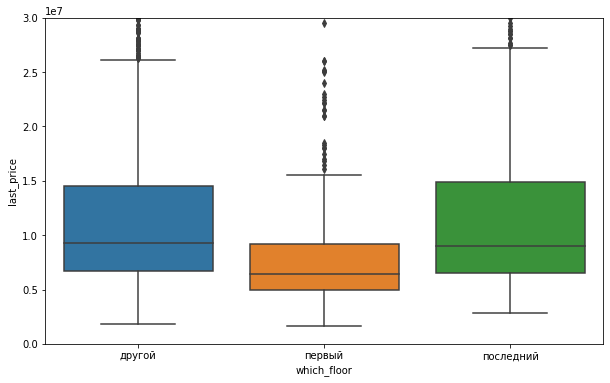

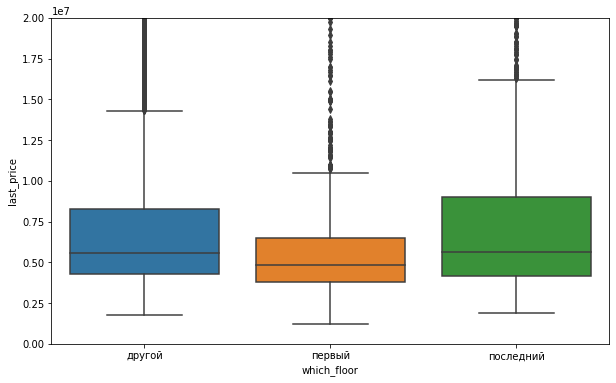

In [67]:
#сравниваю зависимость цены от категории этажа в центре и во всем городе 
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x = "which_floor", y = "last_price", data = df_center_spb)
ax.set_ylim([0, 30_000_000])
plt.show()

plt.figure(figsize = (10, 6))
ax = sns.boxplot(x = "which_floor", y = "last_price", data = df_all_spb)
ax.set_ylim([0, 20_000_000])
plt.show()

в центре основная стоимость квартир на этажах категории другой колеблется от 7млн до 14 млн с медианым значением 9 млн
во всем городе: от 4 млн до 8млн, медианная - 5,5 млн

в центре основная стоимость квартир на первых этажах колеблется от 5млн до 9 млн с медианым значением 6,5 млн
во всем городе: от 3,5 млн до 6,5млн, медианная - 5 млн

в центре основная стоимость квартир на последних этажах колеблется от 6,5млн до 15 млн с медианым значением 9 млн
во всем городе: от 4млн до 8,5млн, медианная - 5,5 млн

## Общий вывод

<b>Изучила архив объявлений о продаже квартир в Санкт-Петербурге и области. </b>
<br>
<b>Площадь</b>
<br>
При изучении параметра площадь былши выявлены выбросы - квартиры очень большой площади от 400квм до 900квм, но наибольшее число объявлений характерно для квартир 40-50квм.
<br>
<b>Цена</b>
<br>
В наибольшем числе объявлений стоимость квартир составляет от 2 до 6млн, чаще всего квартиры стоят около 4 млн рублей, но есть сильные выбросы от 50 млн вплоть до 763 млн - эти цены характерны для квартир с очень большой площадью в Санкт-Петербурге
<br>
<b>Число комнат</b>
<br>
Чаще всего пользователи подают объявления от 1-2комнатных квартирах, чуть реже - 3комнатных. Есть и значение 0 комнат, они характерны для квартир типа студия и для квартир со свободной планировкой. Наибольшее количество комнат - 19, 10-19 комнатные квартиры встречаются при высоком значении параметра площадь помещения - 400-900квм 
<br>
<b>Высота потолков</b>
<br>
В абсолютном большинстве объявлений значится вполне реальная высота потолков - 2,5-2,8 метра, но было и значение 100метров, оно было явно ошибочным, заменила его на медианное для квартир в домах такой же этажности
<br>
<b>Время продажи</b>
<br>
Изучила количество объявлений от 2014 до 2019 года - очень сильно заметно, насколько больше квартир стало продаваться через сервис в разрезе этих лет, и самих объявлений становилось больше в разы. За 2019 год многие квартиры на момент извлечения данных были не проданы, такой вывод был сделан на основе пропущенных значений в столбце количества дней продажи, для удобства анализа эти значения были помечены маркером. 
<br>
Был проанализирован срок продажи квартир, он тоже сильно изменился от 2014 к 2019 году: квартиры стали продаваться гораздо быстрее, делаем вывод о распространении сервиса продажи недвижисоти среди пользоветелей, а также гипотезу об увеличении покупательской способности. 
В 2014 году медианное время продажи квартир было около 2,5 лет, тогда как в 2018 году этот срок стал составлять около двух месяцев. 
<br>
Наибольшее число квартир продавалось за 40-60 дней, чрезвычайно быстрой продажей, на основе анализа, можно считать срок 10 дней (всего 500 квартир было продано за этот срок), а самое долгое размещение объявления - 1580 дней. Это была квартира, выставленная в 2014 году, особо ничем не примечательная, у нее медианные значения цены и площади помещения.
<br>
Была также проанализирована дата размещения объявлений, каждый год в околоновогодний период выставлялось меньще всего квартир на продажу, а также был провал с апреля по июнь 2018 года, что, впрочем, не отразилось на общем числе проданных квартир в этот год, но все же было бы интересно узнать причину, возможно, велись работы на сервисе. 
<br>
<b>Выбивающиеся значения</b>
<br>
Среди выбивающихся значений были квартиры большой площади: 400-900квм, но при изучении среда данных по этим квартирам было принято решение их оставить, так как там были соответствующие значения цен, жилой площади, количества комнат и площади кухни, просто это очень большие квартиры. 
<br>
Отличающимся значением количества комнат считала 7-19 комнат, но так же при изучении среза ничего экстраординарного обнаружено не было, такие комнаты встречаются в дорогих квартирах с большой площадью.
<br>
Были обнаружены как очень дорогие - 763мл (да и все квартиры свыше 50 млн), так и очень дешевые - была обнаружена квартира с ценой около 12тысяч. Тогда как дорогие квартиры были большими по площади, было понятно, что такая дешевая квартира не могла продаваться, значит, была ошибка в данных, которая была впоследствии устранена. 
<br>
Количество балконов, парков и прудов вокруг не выбивалось за норму, в то время как была обнаружена квартира с потолками 100метров, это значение было заменено медианой. 
<br>
<b>Факторы, влияющие на стоимость квартиры</b>
<br>
Выявлена сильная зависимость цены от площади квартиры - корреляция 0,81 после удаления маркированных данных.
<br>
Зависимость цены от количества комнат гораздо слабее - 0,56, но был обнаружен небольшой тренд для увеличения цены при увеличении количества комнат
<br>
Корреляция цены и удаленности от центра еще слабее -0,37. 
<br>
При анализе зависимости цены от категории этажа было выявлено, что квартиры на 1 и на "другом" (не 1 и не последней) этаже характеризуются очень схожими показателями цен, в то время как квартиры на первых этажах стоят дешевле. 
<br>
Были обнаружены достаточно дешевые квартиры с ценой меньше 1млн - эти объявления были размещены в небольих населенных пунктах в области. 
<br>
При изучении данных о дне, месяце и годе размещения не было обнаружено никакой зхависимости от цены. Т.е. дата размещения объявления на цену не влияет. 
<br>
<b>Топ10 самой высокой и самой низкой стоимости жилья по населенным пунктам</b>
<br>
В топ населенных пунктов с самой высокой стоимостью жилья за квм попали: 
<br>
Санкт-Петербург, Зеленогорск, Пушки, Кудрово, Сестрорецк, Левашов, Кудрово, Парголово, Мурино, Мистолово: 104-90 тыс за кв/м
<br>
Топ населенных пунктов с самой низкой стоимостью за кв/м попали:
<br>
Житково, Ям-Тесово, Сижно, Тесово-4, Малая Романовка, Совхозный, Выскатка, Вахнова Кара, Свирь, Старополье с медианной ценой за кв/м от 11 до 15 тыс
<br>
Населенные пункты с наибольшим числом объявлений: 
<br>
Санкт-Петербург, Мурино, Шушары, Всеволожск, Пушкин, Колпино, Парголов, Гатчин, Кудрово, Выборг
<br>
<b>Квартиры в центре Санкт-Петербурга</b>
<br>
Провела анализ цен для квартир в Санкт-Петербурге, разбив их на группы по отдаленности от центра в км, увидев группу с наоболее дорогими квартирами, выделила центральную зону - 8 км от центра
<br>
<b>Сравнение квартир в центре Санкт-Петербурга и во всем городе</b>
<br>
По заданным параметрам сравнила квартиры в центре Санкт-Петербурга и во всем городе, выяснила, что для центральных квартир все параметры выходят выше, нежели в городе:
<br>
больше медианная площадь - 76квм против 55квм
<br>
квартиры в центре стоят гораздо дороже - медианная стоимость около 9млн, тогда как в среднем по городу за квартиру просят 5,5 млн
<br>
количество комнат в центральных квартирах так же больше
<br>
высота потолков 3 метра для центральных и 2.7 для всех в городе
<br>
можно заметить, что для квартир в центре сильней зависимость цены от удаленности от центра и чуть сильнее взаимосвязь количетсва комнат от удаленности
<br>
а дата размещения все так же не влияет на цену ни в центре, ни во всем городе
<br>
и проследила взаимосвязь стоимости и категории этажа:
<br>
в центре все квартиры во всех категориях этажей стоят дороже, и видно, что самые дешевые квартиры так же располагаются на 1 этаже, а стоимость квартир на последнем и на остальных этажах примерно одинаковая - эти данные подтверждают ранее полученные результаты в разрезе общего числа объявлений в предоставленном наборе данных. 


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод